## Task 1: Data Cleaning and Preparation

In [3]:
import pandas as pd
import numpy as np

### 1. Load the dataset


In [4]:
df = pd.read_csv('Cardiotocographic.csv')

### 2. Display first 5 rows


In [5]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


### 3. Check for missing values


In [6]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


### 4. Fill missing values (median imputation)

In [8]:
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

### 5. Check again for missing values

In [9]:
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())


Missing values after cleaning:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


### 6. Check datatypes


In [10]:
print("\nData types of each column:")
print(df_clean.dtypes)


Data types of each column:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


### 7. Save cleaned dataset


In [11]:
df_clean.to_csv('Cardiotocographic_clean.csv', index=False)
print("\nCleaned data saved as 'Cardiotocographic_clean.csv'")


Cleaned data saved as 'Cardiotocographic_clean.csv'


In [12]:
df=pd.read_csv('Cardiotocographic_clean.csv')
print("\nFirst 5 rows of the cleaned dataset:")
print(df.head())


First 5 rows of the cleaned dataset:
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


### 8. Detect outliers using IQR method but don’t cap them
### Outlier Detection

We detected outliers in each feature using the IQR (Interquartile Range) method. 
This method flags values that fall below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

However, since this dataset contains sensitive and potentially clinically relevant fetal health data, 
we decided **not to remove or cap these values**. These outliers may represent actual cases of fetal distress 
or other important patterns that should not be discarded or modified during exploratory analysis.


In [14]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} outliers")


LB: 10 outliers
AC: 43 outliers
FM: 347 outliers
UC: 13 outliers
DL: 125 outliers
DS: 120 outliers
DP: 284 outliers
ASTV: 10 outliers
MSTV: 80 outliers
ALTV: 318 outliers
MLTV: 81 outliers
Width: 10 outliers
Tendency: 10 outliers
NSP: 559 outliers


## Task 2: Statistical Summary

### 1. Create a summary table


In [15]:
summary = df.describe().T


### 2. Add Median and IQR manually


In [16]:
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)

### 3. Reorder & round


In [17]:
summary = summary[['mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']]
summary = summary.round(2)

### 4. Display full summary


In [18]:
print("📊 Statistical Summary of the Dataset:")
print(summary)

📊 Statistical Summary of the Dataset:
            mean  median    std     min    25%    50%     75%     max    IQR
LB        133.34   133.0  11.21   51.84  126.0  133.0  140.00  214.00  14.00
AC          0.00     0.0   0.00   -0.02    0.0    0.0    0.01    0.04   0.01
FM          0.01     0.0   0.07   -0.48    0.0    0.0    0.00    0.96   0.00
UC          0.00     0.0   0.00   -0.01    0.0    0.0    0.01    0.03   0.00
DL          0.00     0.0   0.00   -0.02    0.0    0.0    0.00    0.03   0.00
DS          0.00     0.0   0.00   -0.00    0.0    0.0    0.00    0.00   0.00
DP          0.00     0.0   0.00   -0.01    0.0    0.0    0.00    0.01   0.00
ASTV       47.00    49.0  18.81  -63.00   32.0   49.0   61.00  162.00  29.00
MSTV        1.36     1.2   1.17   -6.60    0.7    1.2    1.70   13.80   1.00
ALTV       10.29     0.0  21.21  -91.00    0.0    0.0   11.00  182.00  11.00
MLTV        8.28     7.4   7.73  -50.70    4.6    7.4   10.80  101.40   6.20
Width      70.40    67.0  42.72 -174.0

### 5. Statistical Summary

We computed descriptive statistics for each variable, including mean, median, standard deviation, min, max, and interquartile range (IQR).

**Key Insights:**
- Some features like `ALTV` and `DP` show a large difference between **mean** and **median**, suggesting **skewed distributions**.
- Variables like `ASTV` and `MLTV` have relatively **high standard deviations**, indicating more variability in fetal heart rate variability measures.
- Features like `UC`, `DL`, and `FM` have **low average values**, which may suggest rare or minimal occurrences in the majority of the samples.

## Task 3. Data Visualization:

### 3.1 — Distribution Plots (Histograms + Boxplots)

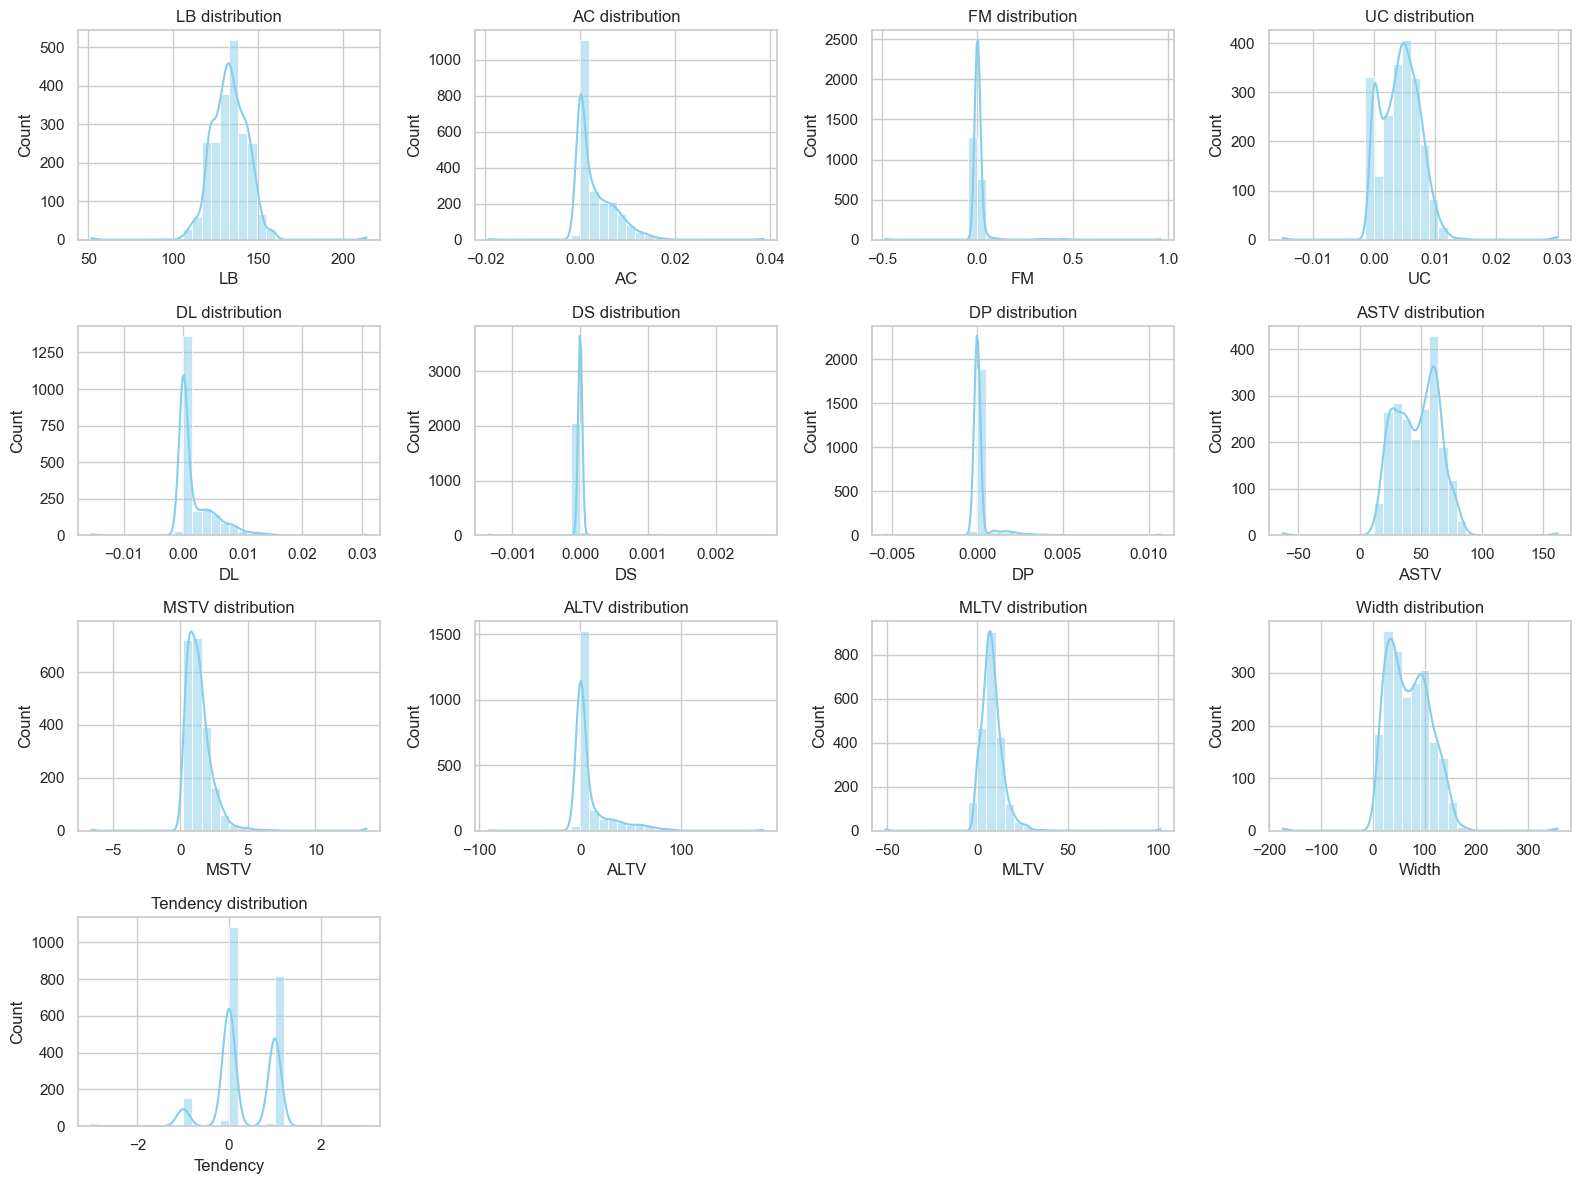

In [20]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# All feature names except the label
features = [c for c in df.columns if c != 'NSP']
n        = len(features)

cols = 4                               # 4 plots per row looks tidy
rows = math.ceil(n / cols)             # as many rows as needed

fig, axes = plt.subplots(rows, cols,
                          figsize=(cols*4, rows*3),
                          squeeze=False)

# Plot each feature
for i, col in enumerate(features):
    r, c = divmod(i, cols)             # row/col index
    sns.histplot(df[col],
                 kde=True,
                 bins=30,
                 color='skyblue',
                 ax=axes[r, c])
    axes[r, c].set_title(f'{col} distribution')

# Remove any unused sub‑axes
for j in range(i+1, rows*cols):
    r, c = divmod(j, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()


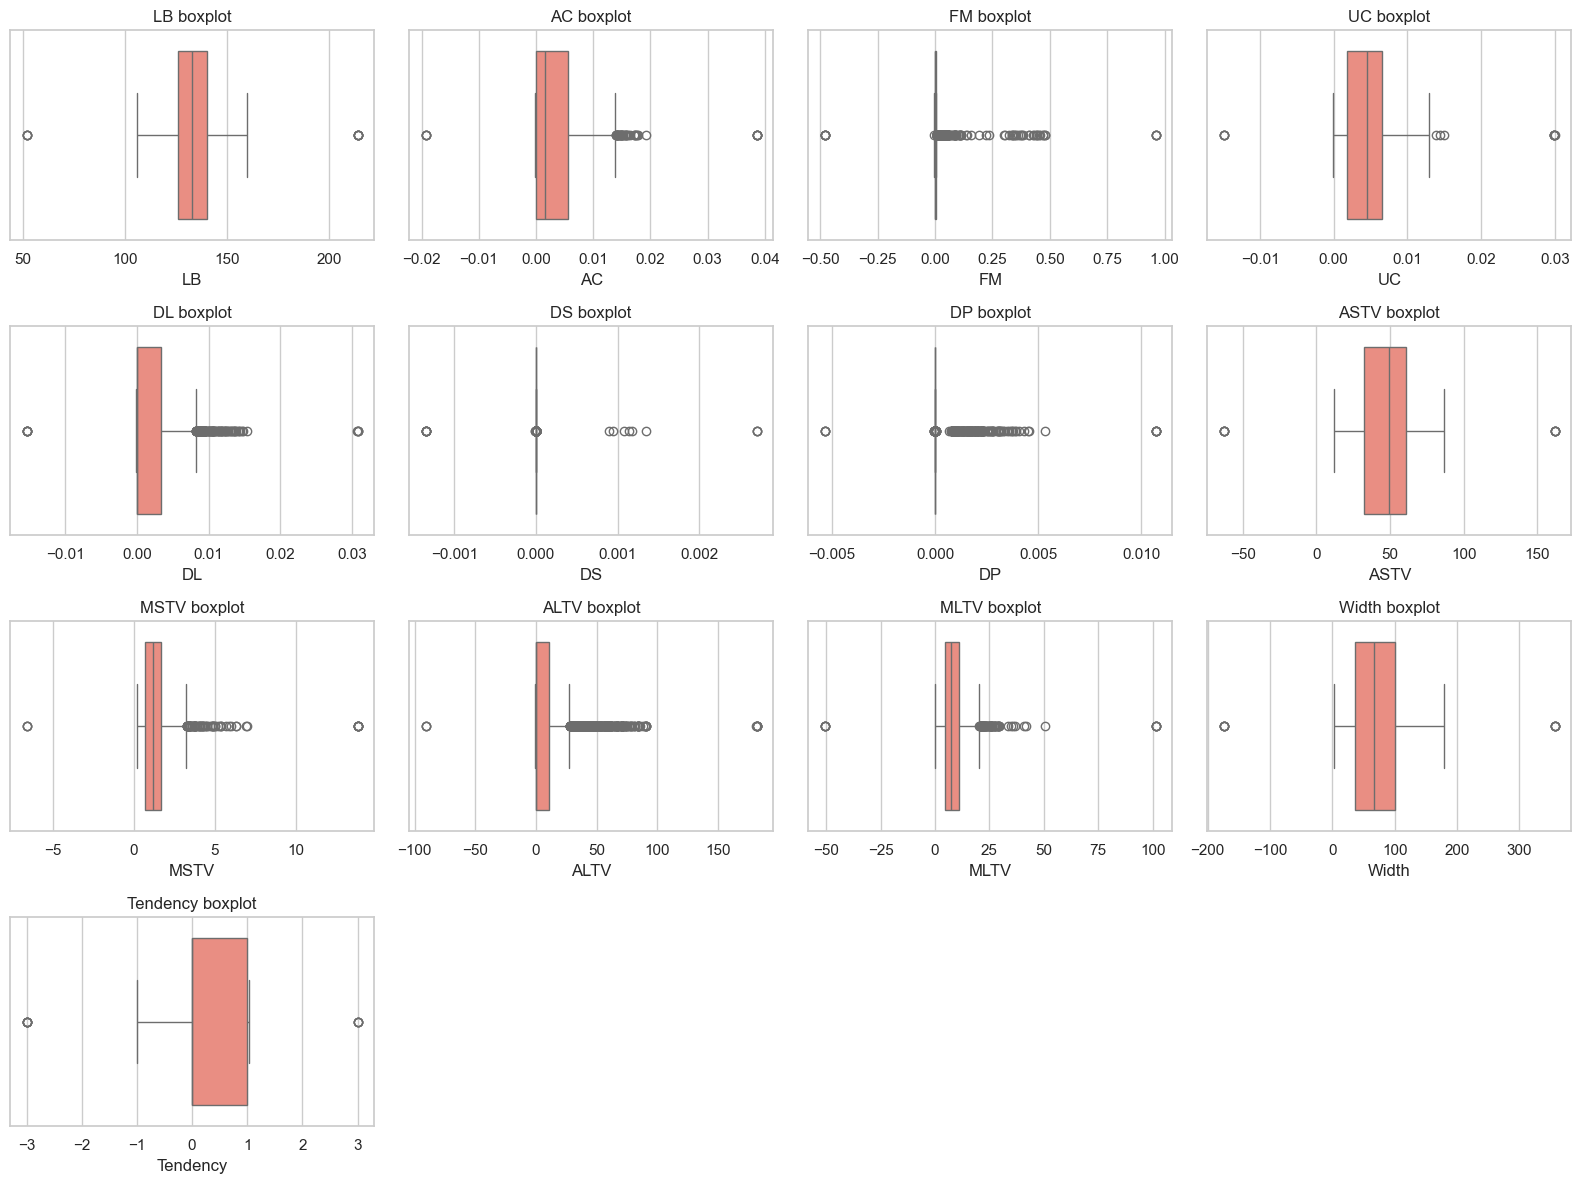

In [22]:
fig, axes = plt.subplots(rows, cols,
                          figsize=(cols*4, rows*3),
                          squeeze=False)

for i, col in enumerate(features):
    r, c = divmod(i, cols)
    sns.boxplot(x=df[col],
                color='salmon',
                ax=axes[r, c])
    axes[r, c].set_title(f'{col} boxplot')

# Remove empty axes
for j in range(i+1, rows*cols):
    r, c = divmod(j, cols)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()


### Distribution & Boxplots

The histograms (with KDE) and boxplots reveal:

* Several variables (e.g., **ALTV**, **DP**) are *right‑skewed* and contain visible outliers.
* Features like **UC**, **DL**, and **FM** cluster near zero, suggesting these events are rare.
* **ASTV** and **MLTV** show wider spreads, indicating more variability in short‑ and long‑term fetal heart‑rate variability.

These insights guide us on which transformations or scaling techniques might be helpful in later modeling.


### 3.2 ‑ Class Distribution (NSP) — Bar & Pie Charts

In [25]:
# Convert NSP to numeric if it got converted incorrectly
df['NSP'] = pd.to_numeric(df['NSP'], errors='coerce')

# Drop any rows where NSP is NaN (just in case)
df = df.dropna(subset=['NSP'])

# Convert NSP to integer
df['NSP'] = df['NSP'].astype(int)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7400\2071879784.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NSP', data=df, palette='pastel')


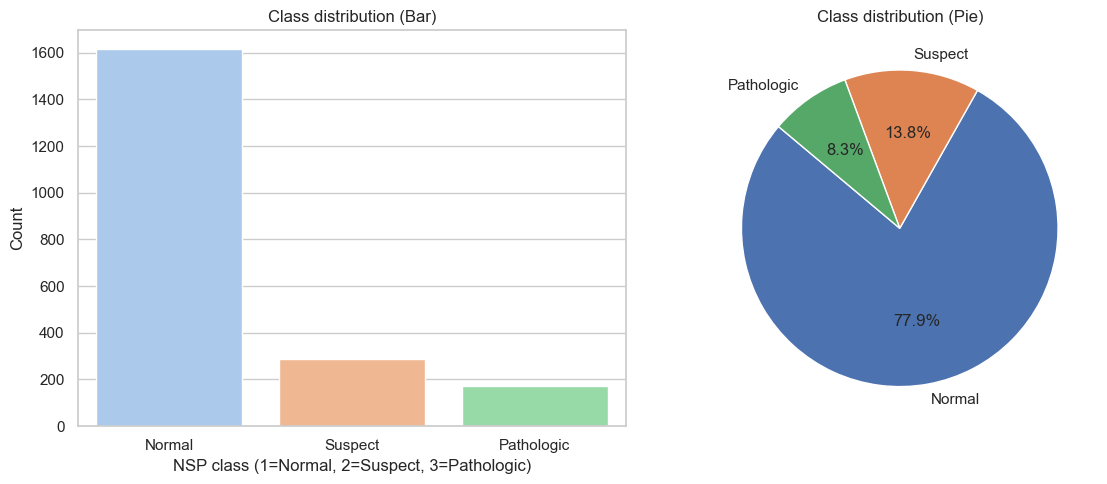

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1.  Keep only valid NSP classes -------------------------------------------------
valid_classes = {1: 'Normal', 2: 'Suspect', 3: 'Pathologic'}
df = df[df['NSP'].isin(valid_classes.keys())]        # filter rows
df['NSP'] = df['NSP'].astype(int)                    # ensure integers

# --- 2.  Build class‑count Series -----------------------------------------------------
class_counts = df['NSP'].value_counts().sort_index()
labels        = class_counts.index.map(valid_classes)   # map to friendly names

# --- 3.  Plot tidy bar+pie charts -----------------------------------------------------
plt.figure(figsize=(12,5))

# Bar chart
plt.subplot(1,2,1)
sns.countplot(x='NSP', data=df, palette='pastel')
plt.title('Class distribution (Bar)')
plt.xlabel('NSP class (1=Normal, 2=Suspect, 3=Pathologic)')
plt.ylabel('Count')
plt.xticks(ticks=[0,1,2], labels=['Normal','Suspect','Pathologic'])  # cleaner x‑labels

# Pie chart
plt.subplot(1,2,2)
plt.pie(class_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops=dict(edgecolor='w'))
plt.title('Class distribution (Pie)')

plt.tight_layout()
plt.show()


### Class Distribution (NSP)

The dataset is **heavily imbalanced**:

- **Normal cases (NSP = 1)** dominate with **77.9%** of the samples.
- **Suspect (NSP = 2)** account for **13.8%**.
- **Pathologic (NSP = 3)** make up only **8.3%**.

This imbalance is important to consider for any future predictive modeling, where techniques like class-weighting, SMOTE, or stratified sampling may be needed to handle this skew.


### 3.3 ‑ Correlation Heatmap + Scatter Plot Matrix


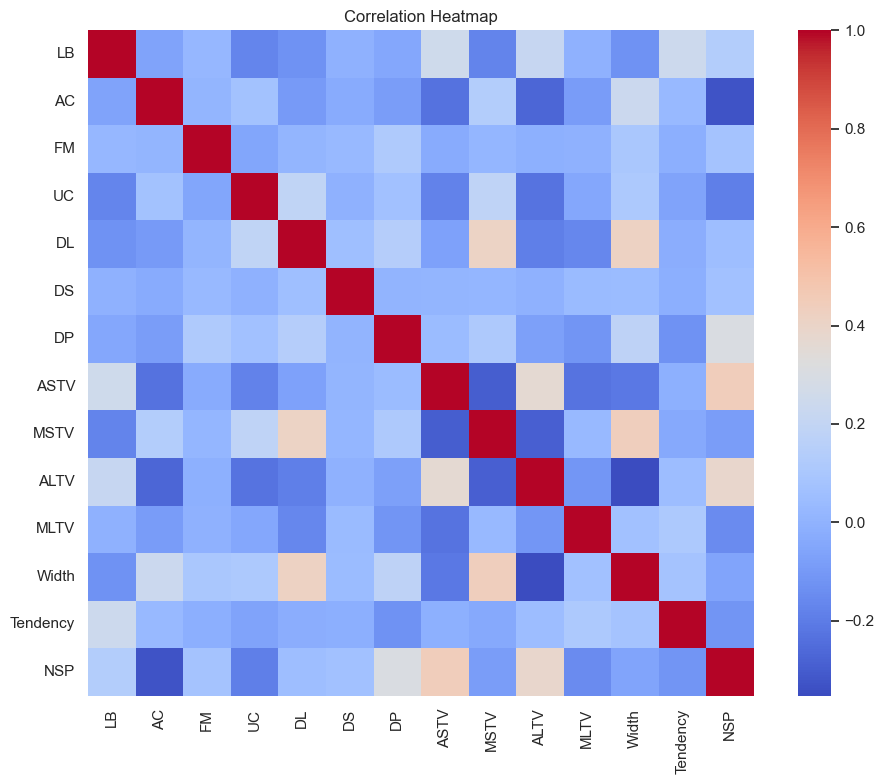

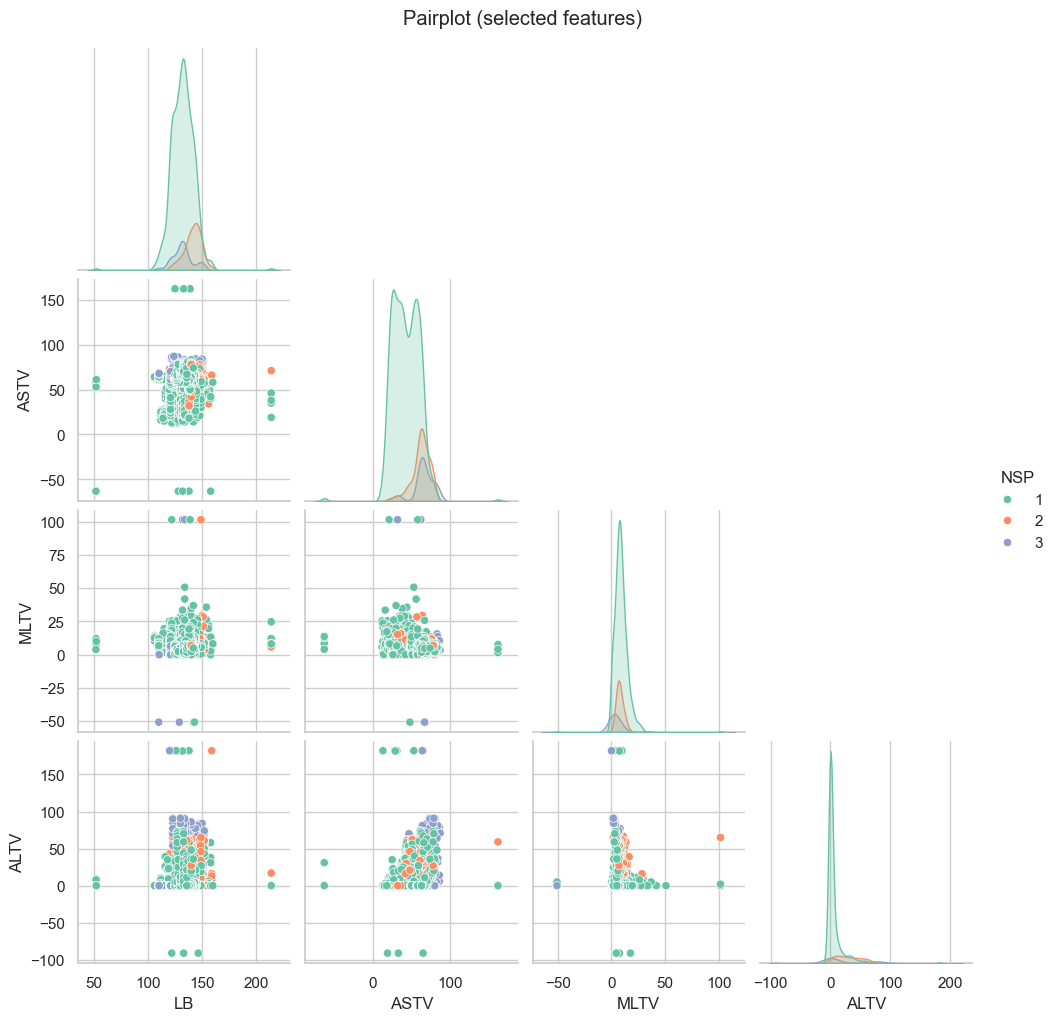

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Correlation heatmap ---
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,
            cmap='coolwarm',
            annot=False,
            fmt='.2f',
            square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# --- Scatter‑plot matrix (pairplot) on a subset to avoid overload ---
subset_cols = ['LB', 'ASTV', 'MLTV', 'ALTV', 'NSP']
sns.pairplot(df[subset_cols],
             hue='NSP',
             palette='Set2',
             corner=True)
plt.suptitle('Pairplot (selected features)', y=1.02)
plt.show()



#### Heatmap Findings:
- **ASTV & MLTV** show a strong positive correlation, suggesting they rise together.
- **ALTV** is negatively correlated with **LB** and **ASTV**, meaning abnormal variability rises when baseline and short-term variability drop.
- **NSP** correlates most with ASTV (−), ALTV (+), and MLTV (+).

#### Pairplot Observations:
- **Normal (NSP=1)** cases cluster around higher ASTV and lower ALTV.
- **Pathologic (NSP=3)** shows lower ASTV and much higher ALTV & MLTV.
- There’s visual separation between classes, especially for ASTV and ALTV — this suggests they’re useful for classification.


### 3.4 — Violin Plots (Feature vs Class)

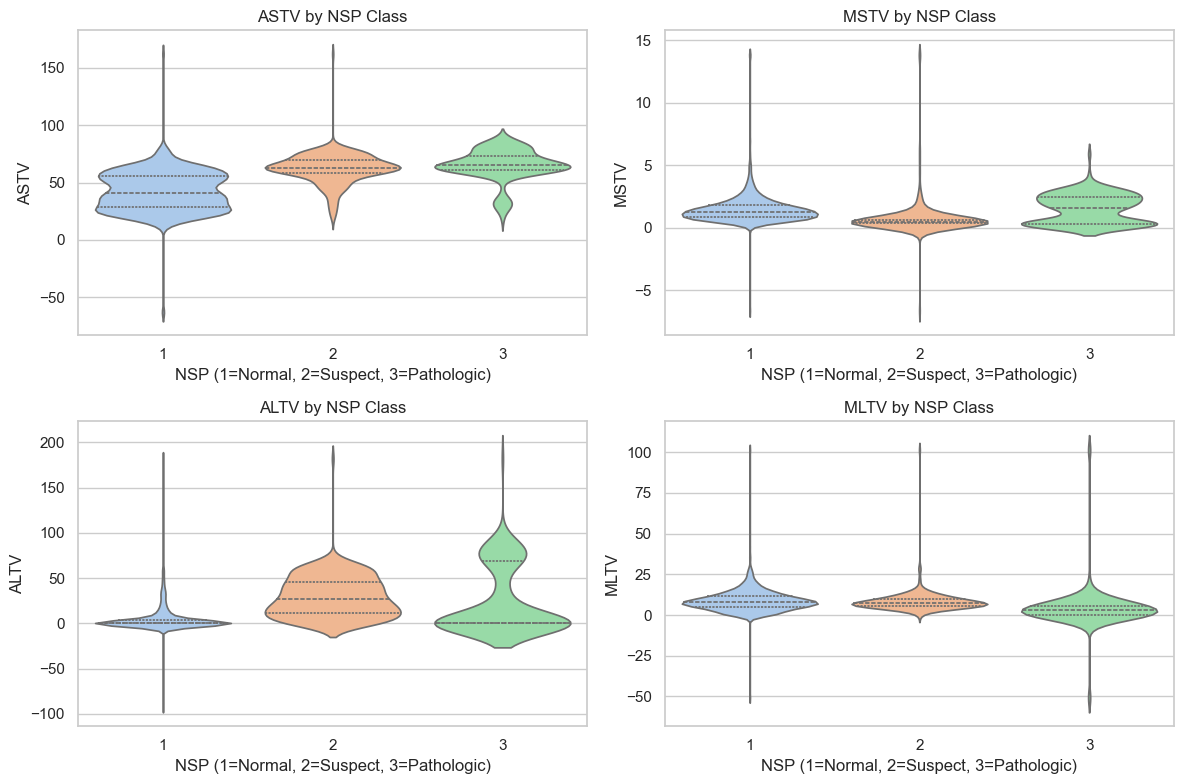

In [30]:
# Violin plots for variability features (no warnings)
violin_features = ['ASTV', 'MSTV', 'ALTV', 'MLTV']
plt.figure(figsize=(12, 8))

for i, feat in enumerate(violin_features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='NSP',
                   y=feat,
                   data=df,
                   hue='NSP',           # explicitly set hue to NSP
                   palette='pastel',
                   inner='quartile',
                   legend=False)        # hide duplicate legend
    plt.title(f'{feat} by NSP Class')
    plt.xlabel('NSP (1=Normal, 2=Suspect, 3=Pathologic)')
    plt.ylabel(feat)

plt.tight_layout()
plt.show()



- **ASTV:** Normal class has higher ASTV; Pathologic has the lowest.
- **ALTV & MLTV:** These are clearly elevated in Pathologic cases — strong indicators of fetal distress.
- **MSTV:** Slightly lower in normal cases, higher in suspect/pathologic.

Overall, **variability features show strong visual patterns** across NSP classes, supporting their predictive importance.


## Task 4 – Pattern Recognition & Insights


In [31]:
import pandas as pd
import numpy as np

# --- 1.  Correlation of every feature with the target (NSP) -----------
corr_with_nsp = df.corr(numeric_only=True)['NSP'].drop('NSP').sort_values()

print("Top correlations with NSP (negative to positive):")
print(corr_with_nsp)

# --- 2.  Strongest feature‑to‑feature correlations (|r| >= 0.5) -------
corr_matrix = df.corr(numeric_only=True).abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

strong_pairs = (
    upper.stack()
         .reset_index()
         .rename(columns={'level_0': 'Feature_1',
                          'level_1': 'Feature_2',
                          0: 'Correlation'})
         .query('Correlation >= 0.5')
         .sort_values('Correlation', ascending=False)
)

print("\nFeature pairs with |r| ≥ 0.5:")
print(strong_pairs)


Top correlations with NSP (negative to positive):
AC         -0.326447
UC         -0.191778
MLTV       -0.149023
Tendency   -0.116950
MSTV       -0.085792
Width      -0.060426
DL          0.053976
DS          0.069252
FM          0.076962
LB          0.134186
DP          0.306442
ALTV        0.382532
ASTV        0.441450
Name: NSP, dtype: float64

Feature pairs with |r| ≥ 0.5:
Empty DataFrame
Columns: [Feature_1, Feature_2, Correlation]
Index: []



#### ➤ Correlation with Target (NSP)

The most informative features based on correlation with fetal state (NSP):

- **ASTV (r = +0.44)**: Strongest positive correlation — higher abnormal short-term variability is linked with fetal distress.
- **ALTV (r = +0.38)**: Abnormal long-term variability also indicates non-normal conditions.
- **DP (r = +0.31)**: Prolonged decelerations contribute to pathologic states.
- **AC (r = –0.33)**: More accelerations are linked to Normal (healthy) status.
- **UC (r = –0.19)**: Uterine contractions are mildly protective.

#### ➤ No Redundant Features

There are **no feature pairs with a correlation ≥ 0.5**, meaning:

- Each feature provides **distinct value**.
- No need for dimensionality reduction or feature removal.

#### ➤ Summary of Patterns

- **Normal (NSP=1)**: High AC, low ASTV & ALTV.
- **Pathologic (NSP=3)**: High ASTV, ALTV, DP.
- These patterns align with medical knowledge — variability and deceleration features are key signals of fetal well-being or distress.

These insights support using features like ASTV, ALTV, and DP in predictive models and clinical monitoring.


## Task 5 – Conclusion & Recommendations

#### 🧠 Summary of Key Findings

After performing exploratory data analysis (EDA) on the cardiotocographic dataset, we uncovered several important insights:

- **Class Distribution**: The dataset is highly imbalanced — around **78% of records** are classified as **Normal**, with the rest split between **Suspect** and **Pathologic**. This imbalance must be addressed during modeling.

- **Feature Importance**: The following features show the strongest correlation with fetal health (NSP):
  - **ASTV (+0.44)**: Higher abnormal short-term variability indicates distress.
  - **ALTV (+0.38)** and **DP (+0.31)**: More variability and prolonged decelerations also suggest risk.
  - **AC (–0.33)**: Accelerations are protective and associated with normal outcomes.

- **Visual Patterns**: Violin and pair plots showed clear class separation based on ASTV, ALTV, and MLTV, making these useful features for classification.

- **No High Feature Correlation**: No feature pairs had correlation above 0.5, so all features bring unique value and can be retained.

---

#### ✅ Recommendations for Next Steps

1. **Model Development**:
   - Use features like ASTV, ALTV, DP, AC as primary predictors.
   - Address class imbalance using techniques like SMOTE, class weights, or stratified sampling.

2. **Clinical Application**:
   - Early alert systems can flag low ASTV and high ALTV/DP values as risk markers.
   - Doctors can monitor these patterns in real-time to improve fetal care.

3. **Further Analysis**:
   - Build classification models (Logistic Regression, Random Forest, etc.) using the insights.
   - Perform feature selection or dimensionality reduction if needed.

---

The EDA phase has revealed strong signal in variability and deceleration features, supporting their use in both predictive modeling and clinical decision support systems.
